<a href="https://colab.research.google.com/github/CatLAG0110/AMZN/blob/main/STORYTELLING%2BINSIGHTS_proyecto_LINIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**STORYTELLING PROYECTO VENTAS ONLINE DE LA EMPRESA XBXB EN LA PLATAFORMA LINIO COLOMBIA**
La empresa XBXB dedicada a la venta al por mayor y menor de electrodomésticos menores para el hogar, incursionó en las ventas digitales desde el 2018 con la creación de su página web, y a partir de allí fue explorando nuevas alternativas en los siguientes años, y hoy en día realiza ventas online en plataformas como lo son Mercado Libre, Linio, Éxito y Shoppe. Para el caso presente de interés, la plataforma LINIO, que realizó su primera venta en el 2020, es la plataforma con menores ventas realizadas mensualmente. Con este proyecto se pretende analizar el comportamiento que han tenido las ventas dentro de la plataforma durante el primer trimestre del 2022 (1/01/2022 – 8/04/2022) con el fin de identificar aquellas variables que permitan aumentar las ventas dentro de la plataforma. 

En este sentido se pregunto si seria posible identificar las futuras compras dentro de la plataforma (cantidad, tipo y marca del producto) y con ello crear estrategias de ventas enfocadas a estos productos y así aumentar los ingresos de ventas de la plataforma LINIO.

Para esto primero se busca identificar los productos con mayor venta, es decir, aquellos productos preferidos por el mercado analizando el tipo de producto y marca, luego se identifican las zonas con mayores ventas y por ultimo se realiza un análisis de los ingresos de la plataforma.


##Contexto comercial:
La empresa XBXB se dedica a la venta al por mayor y detal de electrodomésticos menores para el hogar, con más de 10 años en el mercado, recientemente en el 2019 empezó su camino en las ventas digitales, aun manteniendo sus ventas al por mayor dentro de la empresa. En el último año, las ventas dentro de las plataformas Mercado Libre, éxito, Linio y Shoppe han llegado a igualar ingresos de las ventas al por mayor, por lo cual, se busca potenciar estas plataformas ya que se generan menores gastos en la operación. 

De las plataformas utilizadas por la empresa, LINIO es la que genera menores ingresos, por lo cual la empresa ha solicitado un análisis exhaustivo de las ventas realizadas en la plataforma y así lograr identificar ya sean patrones de compras por parte de los consumidores y posibles proyecciones para el resto del año.

Cabe aclarar que la plataforma LINIO, cuenta con bodega propias de la empresa LINIO, la cual es encargada de enviar los pedidos al cliente final. Si el cliente hace una compra dentro de la plataforma y no hay inventarios en la bodega de LINIO, la empresa XBXB se encarga de hacer todo el trámite desde su sede, tanto la facturación electrónica como el envío y seguimiento del producto.

###Contexto Analítico:
Manipular los datos disponibles proporcionados por la empresa XBXB y proporcionar visualizaciones de los objetivos específicos mencionados.

###Problema Comercial:
La empresa XBXB proporciona un archivo de Excel donde están las ventas realizadas en la plataforma durante el 1 de enero del 2022 y el 8 de abril del 2022. Lo primero que se hace es leer, transformar y preparar datos para su visualización, y lo segundo, realizar análisis y construir visualizaciones de los datos para identificar patrones.

###1. Exploración de los datos (EDA).

Antes de iniciar se hace una exportación de las librerias necesarias.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.colors as colors
import math

# Configuramos algunas opciones de Pandas para Colab
pd.set_option('display.notebook_repr_html',True) # Como se representan los dataframe en colab
pd.set_option('display.max_columns', 10) #  Cuantas columnas se muestran 
pd.set_option('display.max_rows',10) # y cuantas filas

# y algunas configuraciones para matplotlib, muestra las figuras en la misma libreta
%matplotlib inline
# pd.options.display.mpl_style = 'default' # Don't working in Colab

In [ ]:
from google.colab import drive #se conecta el drive en la carpeta donde esta el documento
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/DATA SCIENCE CODER'

/content/gdrive/MyDrive/DATA SCIENCE CODER


In [ ]:
%ls #para buscar las bases de datos que hay en la carpeta

 amazon_co-ecommerce_sample.csv    EXC.csv
'Archivos .csv'@                   linearsep.csv
 cars_clus.csv                     nba_salary.sqlite
 concertriccir2.csv                NEE.csv
'Copia de bank-full.csv'           Order_2022-04-08_131652.xlsx
'Copia de BTCUSD_1hr.csv'         'outlier (1).csv'
'Copia de pune_1965_to_2002.csv'   outlier.csv
'Copia de Time Series Data.csv'    pokemon_data.txt
 Crime1.csv                        pune_1965_to_2002.csv
 Datos@                            sm_app.sqlite
 datos_empresas.csv                sm_app.sqlite-journal
 datos_empresas.gsheet             SO.csv
 D.csv                             ushape.csv
 decision_tree                    'us_presidents 2.csv'
 decision_tree.svg                 vehicle_data.csv
 defaultoutput.xlsx                winequality-red.csv
 DUK.csv                           xor.csv
 ejemplo_1.json


In [ ]:
df= pd.read_excel('Order_2022-04-08_131652.xlsx')
df.head(2)

Order Item Id  Linio Id Seller SKU                  Linio SKU  \
0       12948382  16358038   O-BRLY07   OS093HL0E4CIMLCO-8919720   
1       12948642  16358490        R2B  OS093HL0GM8CPLCO-47845432   

            Created at  ... Receiver Municipality      Fiscal Person  \
0  2022-01-01 19:40:34  ...   Villavicencio-50001  Persona Natural-2   
1  2022-01-01 21:40:14  ...                   NaN                NaN   

              Receiver Type Regimen Payment Means Id Code Payment Means Id  
0  Impuestos sobre las ventas - IVA   Mutuo acuerdo - ZZZ          Contado  
1                               NaN                   NaN              NaN  

[2 rows x 32 columns]

In [ ]:
df.columns #Se observan las columnas del DataFrame

Index(['Order Item Id', 'Linio Id', 'Seller SKU', 'Linio SKU', 'Created at',
       'Updated at', 'Order Currency', 'Invoice Required', 'Shipping Address2',
       'Shipping City', 'Shipping Country', 'Billing City', 'Billing Country',
       'Payment Method', 'Paid Price', 'Unit Price', 'Shipping Fee',
       'Wallet Credits', 'Item Name', 'Shipping Provider',
       'Shipment Type Name', 'Shipping Provider Type',
       'Promised shipping time', 'Premium', 'Status', 'Reason',
       'Receiver Region', 'Receiver Municipality', 'Fiscal Person',
       'Receiver Type Regimen', 'Payment Means Id Code', 'Payment Means Id'],
      dtype='object')

Se eliminan las columnas Order Item Id, Linio Id, Linio SKU, Order Currency, Invoice Required, Shipping Address2, Billing Country, Receiver Region, Receiver Municipality, Payment Means Id Code, Payment Means Id. Ya que estas columnas tienen información repetida dentro del DataFrame.

In [ ]:
df_n=df[['Seller SKU','Item Name','Created at',
       'Updated at',
       'Shipping City', 'Shipping Country', 'Billing City',
       'Payment Method', 'Paid Price', 'Unit Price', 'Shipping Fee',
       'Wallet Credits', 'Shipping Provider',
       'Shipment Type Name', 'Shipping Provider Type',
       'Promised shipping time', 'Premium', 'Status', 'Reason', 'Fiscal Person',
       'Receiver Type Regimen']] 
df_n.head(2)

Seller SKU                                          Item Name  \
0   O-BRLY07  Licuadora Oster Reversible  de color Negro BRL...   
1        R2B                Cafetera personal Oster® BVSTDCDR2B   

            Created at           Updated at                   Shipping City  \
0  2022-01-01 19:40:34  2022-01-06 18:55:57  Bogota, Bogota D.c, Bogota D.c   
1  2022-01-01 21:40:14  2022-01-04 16:24:33  Medellin, Antioquia, Antioquia   

   ... Premium     Status Reason      Fiscal Person  \
0  ...      No  delivered    NaN  Persona Natural-2   
1  ...      No  delivered    NaN                NaN   

              Receiver Type Regimen  
0  Impuestos sobre las ventas - IVA  
1                               NaN  

[2 rows x 21 columns]

In [ ]:
#Se renombran las columnas para que las variables no tengan espacio entre las letras
df_n = df_n.rename(columns={'Seller SKU':'Seller_SKU','Item Name':'Item_Name','Created at': 'Created_at',
       'Updated at':'Updated_at',
       'Shipping City':'Shipping_City', 'Shipping Country':'Shipping_Country', 'Billing City':'Billing_City',
       'Payment Method':'Payment_Method', 'Paid Price':'Paid_Price', 'Unit Price':'Unit_Price', 'Shipping Fee':'Shipping_Fee',
       'Wallet Credits':'Wallet_Credits', 'Shipping Provider':'Shipping_Provider',
       'Shipment Type Name':'Shipment_Type_Name', 'Shipping Provider Type':'Shipping_Provider_Type',
       'Promised shipping time':'Promised_shipping_time', 'Fiscal Person':'Fiscal_Person',
       'Receiver Type Regimen':'Receiver_Type_Regimen'})
df_n.head(3)

Seller_SKU                                          Item_Name  \
0   O-BRLY07  Licuadora Oster Reversible  de color Negro BRL...   
1        R2B                Cafetera personal Oster® BVSTDCDR2B   
2     O-6028  Arrocera multiusos plateada 7 tazas con funció...   

            Created_at           Updated_at                   Shipping_City  \
0  2022-01-01 19:40:34  2022-01-06 18:55:57  Bogota, Bogota D.c, Bogota D.c   
1  2022-01-01 21:40:14  2022-01-04 16:24:33  Medellin, Antioquia, Antioquia   
2  2022-01-01 23:08:30  2022-01-05 10:54:12       Manizales, Caldas, Caldas   

   ... Premium     Status Reason      Fiscal_Person  \
0  ...      No  delivered    NaN  Persona Natural-2   
1  ...      No  delivered    NaN                NaN   
2  ...      No  delivered    NaN  Persona Natural-2   

              Receiver_Type_Regimen  
0  Impuestos sobre las ventas - IVA  
1                               NaN  
2  Impuestos sobre las ventas - IVA  

[3 rows x 21 columns]

In [ ]:
df_n.columns

Index(['Seller_SKU', 'Item_Name', 'Created_at', 'Updated_at', 'Shipping_City',
       'Shipping_Country', 'Billing_City', 'Payment_Method', 'Paid_Price',
       'Unit_Price', 'Shipping_Fee', 'Wallet_Credits', 'Shipping_Provider',
       'Shipment_Type_Name', 'Shipping_Provider_Type',
       'Promised_shipping_time', 'Premium', 'Status', 'Reason',
       'Fiscal_Person', 'Receiver_Type_Regimen'],
      dtype='object')

In [ ]:
#Se identifican las columnas con NaN dentro del nuevo DataFrame
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2568 entries, 0 to 2567
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Seller_SKU              2568 non-null   object 
 1   Item_Name               2568 non-null   object 
 2   Created_at              2568 non-null   object 
 3   Updated_at              2568 non-null   object 
 4   Shipping_City           2568 non-null   object 
 5   Shipping_Country        2568 non-null   object 
 6   Billing_City            2568 non-null   object 
 7   Payment_Method          2568 non-null   object 
 8   Paid_Price              2568 non-null   float64
 9   Unit_Price              2568 non-null   float64
 10  Shipping_Fee            2568 non-null   float64
 11  Wallet_Credits          2568 non-null   int64  
 12  Shipping_Provider       2568 non-null   object 
 13  Shipment_Type_Name      2568 non-null   object 
 14  Shipping_Provider_Type  2568 non-null   

Se identifican las columnas '**Reason**', '**Fiscal Person**' y '**Receiver Type Regimen**' que contienen valores NaN.
En primer lugar, se realiza un nuevo DataFrame con cada columna, para luego rellenar los NaN con los valores correspondientes.

In [ ]:
print(df_n.isnull().sum()) #se cuenta el número con valores NaN

Seller_SKU                  0
Item_Name                   0
Created_at                  0
Updated_at                  0
Shipping_City               0
                         ... 
Premium                     0
Status                      0
Reason                   2409
Fiscal_Person              98
Receiver_Type_Regimen       1
Length: 21, dtype: int64


In [ ]:
#Se nombra un nuevo df con solo la variable 'Reason'
df_reason = df_n[['Reason']]
df_reason.head(2)

Reason
0    NaN
1    NaN

In [ ]:
#Se rellena el nuevo df_reason con la palabra 'No Aplica', ya que estas personas no realizaron ninguna devolución de la compra.
df_reason=df_reason.fillna('No aplica')
df_reason.head(2)

Reason
0  No aplica
1  No aplica

In [ ]:
#Se nombra un nuevo df con solo la variable 'Fiscal_Person'
df_fiscal = df_n[['Fiscal_Person']]
df_fiscal.head(2)

Fiscal_Person
0  Persona Natural-2
1                NaN

In [ ]:
#Se rellena el nuevo df_fiscal con la palabra 'Persona Natural-2'. Previamente se hizo una revisión manual en el dataset original 
#donde se comprueba que estas personas, su razón fiscal es Natural.
df_fiscal=df_fiscal.fillna('Persona Natural-2')
df_fiscal.head(2)

Fiscal_Person
0  Persona Natural-2
1  Persona Natural-2

In [ ]:
df_regimen = df_n[['Receiver_Type_Regimen']]
df_regimen.head(2)

Receiver_Type_Regimen
0  Impuestos sobre las ventas - IVA
1                               NaN

In [ ]:
df_regimen=df_regimen.fillna('Impuestos sobre las ventas - IVA')
df_regimen.head(2)

Receiver_Type_Regimen
0  Impuestos sobre las ventas - IVA
1  Impuestos sobre las ventas - IVA

Ahora se reemplaza las columnas de los nuevos df sin los NaN.

In [ ]:
#se sacan las columnas con las que se crearon los nuevos df
df_n=df_n[['Seller_SKU', 'Item_Name', 'Created_at', 'Updated_at', 'Shipping_City',
       'Shipping_Country', 'Billing_City', 'Payment_Method', 'Paid_Price',
       'Unit_Price', 'Shipping_Fee', 'Wallet_Credits', 'Shipping_Provider',
       'Shipment_Type_Name', 'Shipping_Provider_Type',
       'Promised_shipping_time', 'Premium', 'Status']] 
df_n.head(2)

Seller_SKU                                          Item_Name  \
0   O-BRLY07  Licuadora Oster Reversible  de color Negro BRL...   
1        R2B                Cafetera personal Oster® BVSTDCDR2B   

            Created_at           Updated_at                   Shipping_City  \
0  2022-01-01 19:40:34  2022-01-06 18:55:57  Bogota, Bogota D.c, Bogota D.c   
1  2022-01-01 21:40:14  2022-01-04 16:24:33  Medellin, Antioquia, Antioquia   

   ... Shipment_Type_Name Shipping_Provider_Type Promised_shipping_time  \
0  ...      Own Warehouse               standard    2022-01-03 23:59:59   
1  ...       Dropshipping               standard    2022-01-03 23:59:59   

   Premium     Status  
0       No  delivered  
1       No  delivered  

[2 rows x 18 columns]

In [ ]:
df_n['Reason']=df_reason['Reason']
df_n['Fiscal_Person']=df_fiscal['Fiscal_Person']
df_n['Receiver_Type_Regimen']=df_regimen['Receiver_Type_Regimen']
df_n.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Seller_SKU                                          Item_Name  \
0   O-BRLY07  Licuadora Oster Reversible  de color Negro BRL...   
1        R2B                Cafetera personal Oster® BVSTDCDR2B   

            Created_at           Updated_at                   Shipping_City  \
0  2022-01-01 19:40:34  2022-01-06 18:55:57  Bogota, Bogota D.c, Bogota D.c   
1  2022-01-01 21:40:14  2022-01-04 16:24:33  Medellin, Antioquia, Antioquia   

   ... Premium     Status     Reason      Fiscal_Person  \
0  ...      No  delivered  No aplica  Persona Natural-2   
1  ...      No  delivered  No aplica  Persona Natural-2   

              Receiver_Type_Regimen  
0  Impuestos sobre las ventas - IVA  
1  Impuestos sobre las ventas - IVA  

[2 rows x 21 columns]

Se crea un diccionario para separar los productos de acuerdo a su tipo (Licuadora, batidora,...) y poder agruparlos más facilmente para el respectivo análisis. Además, se crea otro dicionario de acuerod con las marcas de cada producto (BLACK + DECKER, OSTER, UNIVERSAL).

In [ ]:
diccionario = {'210GB':"Licuadora", 
                 '210GG_VERDE':"Licuadora", 
                  '210GR_ROJA':"Licuadora",
                  '210GW_BLANCA':"Licuadora",
               'BLDTCJ - W00 - 011':"Accesorio Exprimidor",
                  'CKSTAF18M':"Freidora de Aire",
                  'CKSTAF55':"Freidora de Aire",
                  'CKSTAM0513':"Tosty Arepa",
                  'FP4200B':"Picatodo",
                  'FPSTJU104':"Exprimidor",
                  'G01':"Horno tostador",
                  'HB2800B':"Batidora",
                  'HF3003W':"Freidora de Aire",
                  'HFD20000B':"Freidora de Aire",
                  'L23600':"Olla a presion",
                  'L71880':"Hervidor",
                  'L75538':"Ventilador",
                  'L89130':"Picatodo",
                  'MX1200R':"Batidora",
                  'MX3000W':"Batidora",
                  'NRD':"Licuadora",
                  'O-2499':"Batidora",
                  'O-2611':"Batidora",
                  'O-2885':"Sanduchera",
                  'O-316W':"Exprimidor",
                  'O-3884':"Plancha",
                  'O-4176':"Exprimidor",
                  'O-4751':"Olla arrocera",
                  'O-4861':"Picatodo",
                  'O-4951L_Azul':"Plancha",
                  'O-6028':"Olla arrocera",
                  'O-6832':"Olla arrocera",
                  'O-7601':"Freidora de Aire",
                  'OBF851':"Ventilador",
                  'O-BRLY07':"Licuadora",
                  'O-CG120':"Sanduchera",
                  'OMF831':"Ventilador",
                  'OSF816':"Ventilador",
                  'OSF818':"Ventilador", 
                  'OTF301':"Ventilador",
                  'R2B':"Cafetera",
                  'R5B':"Cafetera",
                  'SM1000W':"Sanduchera",
                  'TF3813E':"Ventilador",
                  'TO3265XSS-LA':"Horno tostador",
                  'VCBD603':"Aspiradora",
                  'WM1000B':"Waflera"}
map_dictionary_marca = {'210GB':"BLACK + DECKER",
                  '210GG_VERDE':"BLACK + DECKER",
                  '210GR_ROJA':"BLACK + DECKER",
                  '210GW_BLANCA':"BLACK + DECKER",
                  'BLDTCJ - W00 - 011':"OSTER",
                  'CKSTAF18M':"OSTER",
                  'CKSTAF55':"OSTER",
                  'CKSTAM0513':"OSTER",
                  'FP4200B':"BLACK + DECKER",
                  'FPSTJU104':"OSTER",
                  'G01':"OSTER",
                  'HB2800B':"BLACK + DECKER",
                  'HF3003W':"BLACK + DECKER",
                  'HFD20000B':"BLACK + DECKER",
                  'L23600':"UNIVERSAL",
                  'L71880':"UNIVERSAL",
                  'L75538':"UNIVERSAL",
                  'L89130':"UNIVERSAL",
                  'MX1200R':"BLACK + DECKER",
                  'MX3000W':"BLACK + DECKER",
                  'NRD':"OSTER",
                  'O-2499':"OSTER",
                  'O-2611':"OSTER",
                  'O-2885':"OSTER",
                  'O-316W':"OSTER",
                  'O-3884':"OSTER",
                  'O-4176':"OSTER",
                  'O-4751':"OSTER",
                  'O-4861':"OSTER",
                  'O-4951L_Azul':"OSTER",
                  'O-6028':"OSTER",
                  'O-6832':"OSTER",
                  'O-7601':"OSTER",
                  'OBF851':"OSTER",
                  'O-BRLY07':"OSTER",
                  'O-CG120':"OSTER",
                  'OMF831':"OSTER",
                  'OSF816':"OSTER",
                  'OSF818':"OSTER",
                  'OTF301':"OSTER",
                  'R2B':"OSTER",
                  'R5B':"OSTER",
                  'SM1000W':"BLACK + DECKER",
                  'TF3813E':"OSTER",
                  'TO3265XSS-LA':"BLACK + DECKER",
                  'VCBD603':"OSTER",
                  'WM1000B':"BLACK + DECKER"}
df_n['Marca']=df_n['Seller_SKU'].map(map_dictionary_marca)
df_n['Type']=df_n['Seller_SKU'].map(diccionario)
df_n.head(2)

Seller_SKU                                          Item_Name  \
0   O-BRLY07  Licuadora Oster Reversible  de color Negro BRL...   
1        R2B                Cafetera personal Oster® BVSTDCDR2B   

            Created_at           Updated_at                   Shipping_City  \
0  2022-01-01 19:40:34  2022-01-06 18:55:57  Bogota, Bogota D.c, Bogota D.c   
1  2022-01-01 21:40:14  2022-01-04 16:24:33  Medellin, Antioquia, Antioquia   

   ...     Reason      Fiscal_Person             Receiver_Type_Regimen  Marca  \
0  ...  No aplica  Persona Natural-2  Impuestos sobre las ventas - IVA  OSTER   
1  ...  No aplica  Persona Natural-2  Impuestos sobre las ventas - IVA  OSTER   

        Type  
0  Licuadora  
1   Cafetera  

[2 rows x 23 columns]

Acontinuación se arregla la columna Created at y Updated at las cuales contienen fechas.
1. Created at: La fecha de compra del prodcuto.
2. Updated at: La última fecha de actualización en la plataforma. El último registro usualmente es cuando el cliente recibe su producto.
3. Promised shipping time: Fecha prometida de entrega del producto

In [ ]:
fecha_venta=df_n["Created_at"].str.split(expand=True) #se separa la hora y la fecha
fecha_venta.columns = ['Fecha_0','Hora_0']

df_n = pd.concat([df_n,fecha_venta], axis=1)
df_n.head(2)

Seller_SKU                                          Item_Name  \
0   O-BRLY07  Licuadora Oster Reversible  de color Negro BRL...   
1        R2B                Cafetera personal Oster® BVSTDCDR2B   

            Created_at           Updated_at                   Shipping_City  \
0  2022-01-01 19:40:34  2022-01-06 18:55:57  Bogota, Bogota D.c, Bogota D.c   
1  2022-01-01 21:40:14  2022-01-04 16:24:33  Medellin, Antioquia, Antioquia   

   ...             Receiver_Type_Regimen  Marca       Type     Fecha_0  \
0  ...  Impuestos sobre las ventas - IVA  OSTER  Licuadora  2022-01-01   
1  ...  Impuestos sobre las ventas - IVA  OSTER   Cafetera  2022-01-01   

     Hora_0  
0  19:40:34  
1  21:40:14  

[2 rows x 25 columns]

In [ ]:
fecha_final=df_n["Updated_at"].str.split(expand=True) #se separa la hora y la fecha
fecha_final.columns = ['Fecha_1','Hora_1']

df_n = pd.concat([df_n,fecha_final], axis=1)
df_n.head(2)

Seller_SKU                                          Item_Name  \
0   O-BRLY07  Licuadora Oster Reversible  de color Negro BRL...   
1        R2B                Cafetera personal Oster® BVSTDCDR2B   

            Created_at           Updated_at                   Shipping_City  \
0  2022-01-01 19:40:34  2022-01-06 18:55:57  Bogota, Bogota D.c, Bogota D.c   
1  2022-01-01 21:40:14  2022-01-04 16:24:33  Medellin, Antioquia, Antioquia   

   ...       Type     Fecha_0    Hora_0     Fecha_1    Hora_1  
0  ...  Licuadora  2022-01-01  19:40:34  2022-01-06  18:55:57  
1  ...   Cafetera  2022-01-01  21:40:14  2022-01-04  16:24:33  

[2 rows x 27 columns]

In [ ]:
fecha_promesa=df_n["Promised_shipping_time"].str.split(expand=True) #se separa la hora y la fecha
fecha_promesa.columns = ['Fecha_P','Hora_P']

df_n = pd.concat([df_n,fecha_promesa], axis=1)
df_n.head(2)

Seller_SKU                                          Item_Name  \
0   O-BRLY07  Licuadora Oster Reversible  de color Negro BRL...   
1        R2B                Cafetera personal Oster® BVSTDCDR2B   

            Created_at           Updated_at                   Shipping_City  \
0  2022-01-01 19:40:34  2022-01-06 18:55:57  Bogota, Bogota D.c, Bogota D.c   
1  2022-01-01 21:40:14  2022-01-04 16:24:33  Medellin, Antioquia, Antioquia   

   ...    Hora_0     Fecha_1    Hora_1     Fecha_P    Hora_P  
0  ...  19:40:34  2022-01-06  18:55:57  2022-01-03  23:59:59  
1  ...  21:40:14  2022-01-04  16:24:33  2022-01-03  23:59:59  

[2 rows x 29 columns]

Ahora se modifica el nuevo df_n dejando solo las columnas necesarias para el analisis del proyecto.

In [ ]:
df_n =df_n[['Fecha_0', 'Fecha_1','Fecha_P','Seller_SKU', 'Item_Name','Marca', 'Type',
            'Billing_City', 'Payment_Method', 'Paid_Price',
            'Unit_Price', 'Shipping_Fee', 'Wallet_Credits', 'Shipping_Provider',
            'Shipment_Type_Name', 'Premium', 'Status', 'Reason',
            'Fiscal_Person', 'Receiver_Type_Regimen']]
df_n.head(3)

Fecha_0     Fecha_1     Fecha_P Seller_SKU  \
0  2022-01-01  2022-01-06  2022-01-03   O-BRLY07   
1  2022-01-01  2022-01-04  2022-01-03        R2B   
2  2022-01-01  2022-01-05  2022-01-03     O-6028   

                                           Item_Name  ... Premium     Status  \
0  Licuadora Oster Reversible  de color Negro BRL...  ...      No  delivered   
1                Cafetera personal Oster® BVSTDCDR2B  ...      No  delivered   
2  Arrocera multiusos plateada 7 tazas con funció...  ...      No  delivered   

      Reason      Fiscal_Person             Receiver_Type_Regimen  
0  No aplica  Persona Natural-2  Impuestos sobre las ventas - IVA  
1  No aplica  Persona Natural-2  Impuestos sobre las ventas - IVA  
2  No aplica  Persona Natural-2  Impuestos sobre las ventas - IVA  

[3 rows x 20 columns]

In [ ]:
df_n['Descuentos'] = df_n.apply(lambda x: x['Unit_Price'] - x['Paid_Price'], axis = 1)
df_n.head(2)

Fecha_0     Fecha_1     Fecha_P Seller_SKU  \
0  2022-01-01  2022-01-06  2022-01-03   O-BRLY07   
1  2022-01-01  2022-01-04  2022-01-03        R2B   

                                           Item_Name  ...     Status  \
0  Licuadora Oster Reversible  de color Negro BRL...  ...  delivered   
1                Cafetera personal Oster® BVSTDCDR2B  ...  delivered   

      Reason      Fiscal_Person             Receiver_Type_Regimen  Descuentos  
0  No aplica  Persona Natural-2  Impuestos sobre las ventas - IVA     40000.0  
1  No aplica  Persona Natural-2  Impuestos sobre las ventas - IVA         0.0  

[2 rows x 21 columns]

Ahora el DataFrame esta listo para el análisis

###2. Solución del problema comercial.

Acontinuación se especifica la informacioón que contiene cada columna del DataFrame
 - Fecha_0: Fecha de la compra en la plataforma.
 - Fecha_1: Fecha de la última actualización en la plataforma. La fecha en que el cliente recibio el producto.
 - Fecha_P: Fecha en la que la plataforma le promete al cliente que le llegara el producto.
 - Seller_SKU: Referencia del producto.
 - Item_Name: Nombre completo de producto.
 - Marca: Marca del producto (Puede ser Oster, Universal, B&D)
 - Type: Tipo de producto. Se clasifica los productos según su tipo, ya que, se venden licuadoras de diferentes referencias y marcas.
 - Billing_City: Lugar de donde vive el cliente.
 - Payment_Method: Método de pago. Puede ser de contado, tarjeta de crédito, pago por PSE, etc.
 - Paid_Price: Valor pagado del producto.
 - Unit_Price: Valor original del producto.
 - Shipping_Fee: Valor de envio, algunos lugares no se cubre el envio dentro de la plataforma.
 - Wallet_Credits: Créditos que tenga el cliente dentro de la plataforma que son utilizados dentro de la cuenta.
 - Shipping_Provider: Empresa transportadora que se usa para el envio de la mercancia.
 - Shipment_Type_Name:Tipo de envio, si es por dropshipping o se envia desde la bodega de la empresa.
 - Premium: Si el cliente solicita un envio mas rápido o no.
 - Status: Estado de la entrega.
 - Reason: Razón de la devolución del producto.
 - Fiscal_Person: Que tipo de persona hizo la compra, ya sea natural o jurídica.
 - Receiver_Type_Regimen: Tipo de impuestos aplicados a la compra como el IVA.
 - Descuentos: Descuentos aplicados a la compra.

Para iniciar este analisis, lo primero que se hace es identificar la cantidad de productos vendidos durante el primer trimestre del 2022, en el cual se se evidencia por medio de un gráfico horizontal que los productos con mayores ventas son las licuadoras (1279 unidades), seguida por los ventiladores (385 unidades) y por último las freidoras de aire (322 unidades). 

Además, se evidencia los productos con menor, los cuales son: Accesorio de exprimidor, Aspiradora, Hervidor de agua, Planchas, Wafleras y Olla a presión
 con ventas menores a 10 unidades durante todo el primer trimestre. 


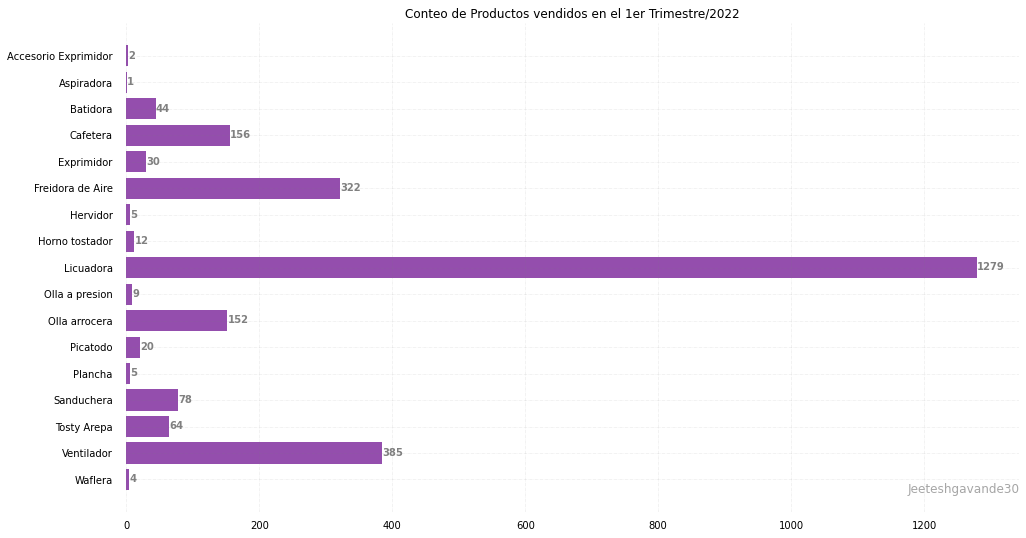

In [ ]:
df_productos=df_n[['Marca','Type']].groupby(by='Type').count() 
fig, ax = plt.subplots(figsize =(16, 9))#Tamaño de la figura
ax.barh(df_productos.index, df_productos.Marca, color ='#944EAD')#Barra horizontal
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Add Plot Title
ax.set_title('Conteo de Productos vendidos en el 1er Trimestre/2022',
             loc ='center')
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
# Show Plot
plt.show()

De lo cual se puede concluir que el mercado tiene mayor preferencia en la compra de productos como las licuadoras, ventiladores y freidoras. Por lo que la empresa XBXB puede generar estregias de ventas potencializando en mayor medida estos productos ya sea ofreciendo descuentos o precios especiales, entre otros.

Por otra parte, es claro que los Accesorio de exprimidor, Aspiradora, Hervidor de agua, Planchas, Wafleras y Olla a presión, son los productos menos consumidos en la plataforma, teniendo ventas inferiores a 10 unidades en tres meses.

Con esta información, la empresa puede gestionar mejor el manejo de bodega con la empresa LINIO priorizando los productos "estrellas" y que estos permanezcan en la bodega de LINIO y dejando en la sede los productos menos vendidos.

**INSIGHT 1:** Los productos preferidos y más comprados en la plataforma virtual son las Licuadoras, los ventiladores, las freidoras de aire, cafeteras y ollas arroceras

<Figure size 1440x288 with 0 Axes>

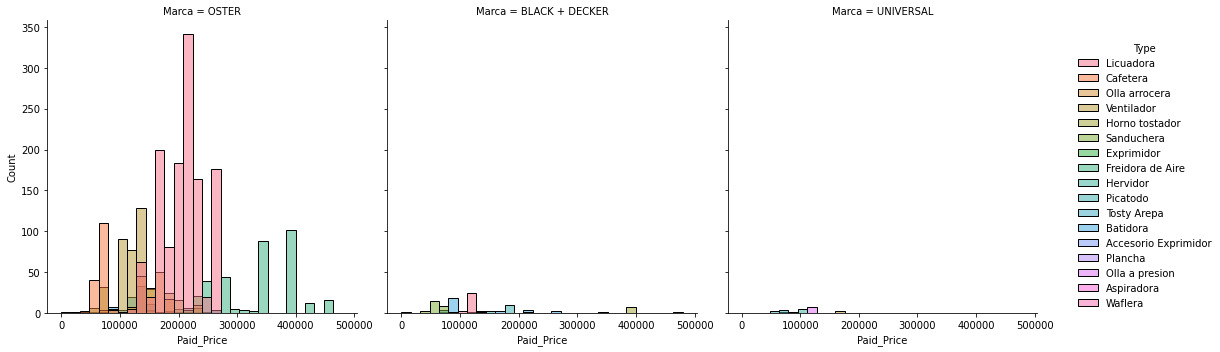

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(20,4))
# Axes-level
# Notemos sns.histplot
sns.displot(data=df_n, x="Paid_Price",hue="Type", col='Marca')

Adicionalmente, con los gráficos anteriores se puede observar que la Marca más vendida y con mayor variedad de productos son los pertenecientes a la marca Oster. Por otro lado los precios de los productos comprados, la mayoria oscilan entre los 100.000 (pesos colombianos) y 300.000 (pesos colombianos).

Una vez identificado los productos estrellas, es decir, los más vendidos. Es momento de realizar un análisis de los ingresos de la venta de estos, y de los demás productos, y ver realmente el impacto de estos en los ingresos.

**INSIGHT 2:** La marca con mayor popularidad en la plataforma es OSTER, ya que esta ofrece garantia del producto hasta de 1 año despues de la compra, además del facil acceso a la obtención de repuesto de sus prodcutos. 

In [ ]:
df_venta= df_n.groupby('Fecha_0')[['Paid_Price']].sum() #se hace un groupby para sumar los productos totales vendidos cada día.
df_venta.reset_index(inplace = True)
df_venta.head(2)

Fecha_0  Paid_Price
0  2022-01-01    424700.0
1  2022-01-02    948200.0

In [ ]:
df_venta.describe()

Paid_Price
count  9.800000e+01
mean   5.098004e+06
std    1.777544e+07
min    4.247000e+05
25%    1.671500e+06
50%    2.789851e+06
75%    4.160275e+06
max    1.776883e+08

In [ ]:
df_venta.Fecha_0= pd.to_datetime(df_venta.Fecha_0)
df_venta.tail(2)

Fecha_0  Paid_Price
96 2022-04-07  9791300.71
97 2022-04-08  1059600.00

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(df_venta, x ="Fecha_0", y="Paid_Price", 
              title='Venta Diaria 1er Trimestre del 2022', color_discrete_sequence = ['navy'],
              markers = True)
fig.update_traces(showlegend=False, opacity=0.7)
fig.show()

Se nota un valor atipico dentro de la serie de tiempo, esto se debe al día sin iva, donde los consumidores puedan adquirir un grupo importante de productos sin tener que pagar el Impuesto al Valor Agregado, IVA, del 19 %, haciendo que el valor que pagan se inferior al valor en los otros días. 

Debido a que estos días suceden 3 veces durante el año, se excluye del df, para obtener un mejor analisis y modelo en el proyecto.

In [ ]:
#Se ve un valor atipico y se encuentra dentro del df
df_venta.iloc[69]

Fecha_0       2022-03-11 00:00:00
Paid_Price            177688329.4
Name: 69, dtype: object

In [ ]:
df_venta_drop= df_venta.drop([69]) #se elimina la fila del día 11 de marzo del 2022
fig2 = px.line(df_venta_drop, x ="Fecha_0", y="Paid_Price", 
              title='Venta Diaria 1er Trimestre del 2022', color_discrete_sequence = ['darkmagenta'],
              markers = True)
fig2.update_traces(showlegend=False, opacity=0.7)
fig2.show()

Se puede observar que los meses donde se evidenciaron mayores ingresos fueron en el mes de Enero y los primeros días del mes de Abril. Teniendo una media de ingresos de 5'000.000 pesos colombianos.

**INSIGHT 3:** La venta promedio dentro de la plataforma linio esta entro los 5'000.0000 y 6'000.000 de pesos colombianos.

In [ ]:
df_venta_tipo=df_n.groupby('Type')['Unit_Price','Shipping_Fee','Descuentos','Paid_Price'].sum()
df_venta_tipo.head(2) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Unit_Price  Shipping_Fee  Descuentos  Paid_Price
Type                                                                  
Accesorio Exprimidor    150000.0        9900.0     15000.0    135000.0
Aspiradora              214202.0           0.0         0.0    214202.0

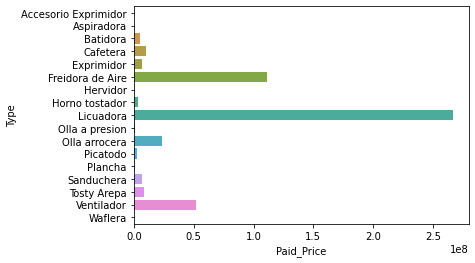

In [ ]:
sns.barplot(x='Paid_Price',y=df_venta_tipo.index,data=df_venta_tipo)

Es posible concluir que los productos con mayores entradas son las licuadoras, ventiladores y ollas freidoras. Pero por el contrario que gráficos anteriores, donde la cantidad los Ventiladores vendida fue mayor, recolecto menos dineros que las ollas freidoras.

Además se evidencia que los productos como las waffleras, planchas, olla a presión, Hervidor de Agua, Aspiradora u accesorio de exprimidor no tiene un impacto significativo en las ventas, es decir su aporte es mínimo.

Por último se identifican los productos con mayores ventas de acuerdo al departamento de procedencia de los clientes. Se cuentan los productos comprados dependiendo del departamento de destino, y se ubican de mayor a menor, solo mostrando los primeros 10 (el Top 10).

**INSIGHT 3:** La mayoria de sus ingresos provienen de las licuadoras, seguidas por las ollas freidoras de aire.

In [ ]:
df_ciudad= df_n['Billing_City'].value_counts()
df_ciudad.head(10) #Los 10 departamentos con mayores pedidos

Bogota D.C            414
Valle Del Cauca       299
Antioquia             295
Cundinamarca          283
Santander             225
Atlantico             137
Norte De Santander    111
Bolivar               107
Tolima                 94
Huila                  75
Name: Billing_City, dtype: int64

In [ ]:
df_ciudad.tail(3)

cucuta      1
Guaviare    1
Choco       1
Name: Billing_City, dtype: int64

<Figure size 1440x288 with 0 Axes>

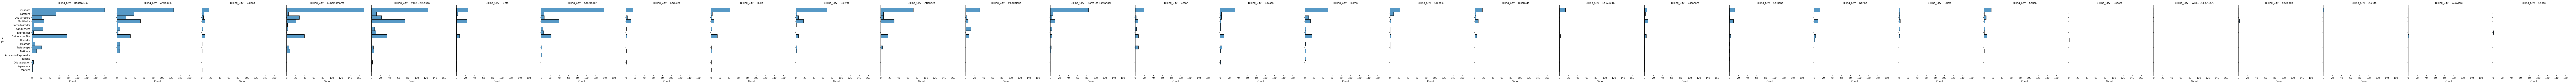

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(20,4))
# Axes-level
# Notemos sns.histplot
sns.displot(data=df_n, y="Type", col='Billing_City')

De lo anterior, es posible afirmar que el producto más vendido en cada departamento son las licuadoras, en su mayoria las de marca OSTER, Aunque la empresa esta ubicada en el departamento de Antioquia, dentro de la plataforma LINIO, gran parte de sus clientes son de Bogota D.C/Cundinamarca, con un total de 697 pedidos en el primer trimestre del 2022. Seguido por Valle del Cauca, Antioquia y santander donde las ventas son superiores a 200 pedidos.

**INSIGHT 4:** Los departamentos con mayores pedidos son Bogotá DC, Cundinamarca, Valle del Cauca, Antioquia y Santender. 

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip #instalación de nueva libreria

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.0 MB)


In [ ]:
import pandas_profiling #Se importa la libreria para el analisis de las variables 

####Análisis detallado univeriado de cada variable del df Linio:
Antes de realizar el analisis univariado de cada variables, se escoje del df de LINIO las variables a analizar.

In [ ]:
df_n.columns

Index(['Fecha_0', 'Fecha_1', 'Fecha_P', 'Seller_SKU', 'Item_Name', 'Marca',
       'Type', 'Billing_City', 'Payment_Method', 'Paid_Price', 'Unit_Price',
       'Shipping_Fee', 'Wallet_Credits', 'Shipping_Provider',
       'Shipment_Type_Name', 'Premium', 'Status', 'Reason', 'Fiscal_Person',
       'Receiver_Type_Regimen', 'Descuentos'],
      dtype='object')

In [ ]:
df_linio= df_n[['Fecha_0', 'Item_Name', 'Marca',
       'Type', 'Billing_City', 'Paid_Price', 'Unit_Price',
       'Shipping_Fee', 'Shipping_Provider',
       'Shipment_Type_Name','Status', 'Reason', 'Fiscal_Person',
        'Descuentos']]

In [ ]:
#Data Profiling del df de LINIO
profile = pandas_profiling.ProfileReport(df_linio)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**INSIGHT 5:** La licuadora más vendida es la Licuadora Oster Reversible de Color negro (983), seguida por la licuadora cromada con vaso de vidrio (268). 

**INSIGHT 6:** La transportadora más usada para el envio de los productos es TCC con un total de 1510 envíos, seguido por Deprisa con un total de 871 envíos.

**INSIGHT 7:** Del total de los pedidos realizados durante el primer trimestre del 2022 47 pedidos fueron cancelados, 65 pedidos no se completaron, y 24 fueron devueltos. De los 2568 pedidos realizados el 90% fueron completados con exito.

###3. Complementación de datos (APis).

Ahora bien, para darle una mayor profundidad al analisis, se busca información adicional que ayude a complementar el proyecto.

Primero se hace una exploración de los datos disponibles que ayuden a mejorar el proyecto inicial de ventas online a través de la plataforma LINIO. De las 512 dataset disponibles, se encontraron tres potenciales para el presente proyecto:

1. **Internet Fijo Accesos por tecnología y segmento:** Número de suscriptores con acceso dedicado a Internet para cada uno de los departamentos y municipios de Colombia, según los datos reportados por los proveedores al último día de cada trimestre. Basados en estos datos y en las proyecciones del DANE para la población por municipio, departamento y en total en Colombia, se muestra el porcentaje de penetración de Internet fijo (Periodo 2015-4T 2019-1T).
2. **Internet Móvil suscriptores por proveedor:** Índice de penetración de los suscriptores y cantidad total de suscriptores de Internet con acceso móvil por suscripción. Los datos se muestran discriminados por proveedor y en total en Colombia (Periodo 2015-4T hasta 2019-1T).
3. **Hogares Conectados CONSOLIDADO FASE I Y II:** Proyecto que lleva Internet a las familias de estratos 1 y 2, y Viviendas de Interés Prioritario -VIP, con el objetivo de que usen y se apropien de la tecnología.

Luego de realizar una exploración general de los data set, solo se utilizaran las opciones 1 y 2 para el presente poryecto.

*¿Por que se eligen estas dos bases de datos?*

Ya que al ser productos que son vendidos a traves de una plataforma online, es necesario el acceso a internet ya sea, internet fijo en casa o con internet móvil para poder realizar compras en la plataforma. 


NOTA:Los datos son extraidos de la página https://www.gov.co/ DATOS ABIERTOS COLOMBIA, la cual tiene grandes bases de dátos públicas disponibles para descargar.




In [ ]:
#Se copia la API del dataset a utilizar "INTERNET MÓVIL SUSCRIPTORES POR PROVEEDOR"
URL = 'https://www.datos.gov.co/resource/3grk-w373.json'
df1 = pd.read_json(URL)
df1.head(10)

proveedor  anno  trimestre  suscriptores  \
0  UNE EPM TELECOMUNICACIONES S.A.  2018          2             0   
1    VIRGIN MOBILE COLOMBIA S.A.S.  2018          2             0   
2    VIRGIN MOBILE COLOMBIA S.A.S.  2018          3             0   
3    VIRGIN MOBILE COLOMBIA S.A.S.  2018          4             0   
4    VIRGIN MOBILE COLOMBIA S.A.S.  2019          1             0   
5                 NESH MOVIL S A S  2019          2             0   
6    VIRGIN MOBILE COLOMBIA S.A.S.  2019          2             0   
7                 NESH MOVIL S A S  2019          3             0   
8    VIRGIN MOBILE COLOMBIA S.A.S.  2019          3             0   
9    VIRGIN MOBILE COLOMBIA S.A.S.  2019          4             0   

   poblacion_dane indice_de_penetracion  
0        48258494                     0  
1        48258494                     0  
2        48258494                     0  
3        48258494                     0  
4        49395678                     0  
5        49395678                     0  
6        49395678                     0  
7        49395678                     0  
8        49395678                     0  
9        49395678                     0

In [ ]:
df1.shape #tamaño del DataFrame

(78, 6)

In [ ]:
#Se copia la API del dataset a utilizar "INTERNET FIJO ACCESOS POR TECNOLOGÍA Y SEGMENTO"
URL1 = 'https://www.datos.gov.co/resource/n48w-gutb.json'
df2 = pd.read_json(URL1)
df2.head(10)

anno  trimestre                                proveedor  cod_departamento  \
0  2021          3                    DIRECTV COLOMBIA LTDA                52   
1  2021          3                           CABLEMAS S.A.S                25   
2  2022          1  COLOMBIA TELECOMUNICACIONES S.A. E.S.P.                81   
3  2021          3      COMUNICACION CELULAR S A COMCEL S A                23   
4  2021          3     AZTECA COMUNICACIONES COLOMBIA S.A.S                50   
5  2021          3  DOBLECLICK SOFTWARE E INGENIERIA S.A.S.                52   
6  2021          3                    DIRECTV COLOMBIA LTDA                76   
7  2021          3     AZTECA COMUNICACIONES COLOMBIA S.A.S                76   
8  2021          3     AZTECA COMUNICACIONES COLOMBIA S.A.S                66   
9  2021          3    CENTRAL DE SERVICIOS DIGITALES S.A.S.                17   

      departamento  ...                 segmento  \
0           NARI�O  ...  RESIDENCIAL - ESTRATO 1   
1     CUNDINAMARCA  ...  RESIDENCIAL - ESTRATO 3   
2           ARAUCA  ...  RESIDENCIAL - ESTRATO 2   
3          CORDOBA  ...  RESIDENCIAL - ESTRATO 4   
4             META  ...              CORPORATIVO   
5           NARI�O  ...         SIN ESTRATIFICAR   
6  VALLE DEL CAUCA  ...  RESIDENCIAL - ESTRATO 3   
7  VALLE DEL CAUCA  ...  RESIDENCIAL - ESTRATO 1   
8        RISARALDA  ...              CORPORATIVO   
9           CALDAS  ...  RESIDENCIAL - ESTRATO 2   

                       tecnologia velocidad_bajada velocidad_subida  \
0  OTRAS TECNOLOG�AS INAL�MBRICAS                4                1   
1        FIBER TO THE HOME (FTTH)               40               40   
2                            XDSL                5                1   
3                           CABLE              100               10   
4        FIBER TO THE HOME (FTTH)              200              100   
5        FIBER TO THE HOME (FTTH)               25               25   
6  OTRAS TECNOLOG�AS INAL�MBRICAS               10                1   
7        FIBER TO THE HOME (FTTH)               10                5   
8        FIBER TO THE HOME (FTTH)              100              100   
9        FIBER TO THE HOME (FTTH)               10               10   

   no_de_accesos  
0              3  
1              2  
2            247  
3            111  
4              3  
5              4  
6             13  
7              3  
8              3  
9            312  

[10 rows x 12 columns]

In [ ]:
df2.shape #tamaño del DataFrame

(1000, 12)

El df1 esta conformado por 6 columnas y 78 filas. Las columnas proveen la siguiente información:

1. Proveedor: empresa de telefónia
2. Anno: Año en el que toma el dato.
3. Trimestre: trimestre en el que se tomo el datos
3. Suscriptores: clientes actuales de la empresa de telefonía.
4. Población dane: población total actual del datos en Colombia.
5. Índice de penetración: Índice de pentración de mercardo de las empresas en la población Colombiana

Por otro lado el df2 esta conformado por 12 columnas y 1000 filas. Las columnas proveen la siguiente información:

1. Anno: Año
2. Trimestre: Número del trimestre
3. Proveedor: Nombre del proveedor de internet fijo
4. Cod_departamento: Código del departamento
5. Departamento: Nombre del departamento
6. Cod_municipio: Código del municipio
7. Municipio: Nombre del municipio
8. Segmento: Tipo de internet (puede ser coorporativo o residencial)
9. Tecnología: Tipo de tecnologia de conexión a intenet
10. Velocidad_bajada: Velocidad bajada en Mbps
11. Velocidad_subida: Velocidad subida en Mbps
12. No_de_accesos: Número de accesos

Primero se empieza con la exploración y limpieza del df1.

In [ ]:
#Ahora se verifica el tipo de datos que se tiene del df1
df1.dtypes

proveedor                object
anno                      int64
trimestre                 int64
suscriptores              int64
poblacion_dane            int64
indice_de_penetracion    object
dtype: object

In [ ]:
df1['indice_de_penetracion']= pd.to_numeric(df1['indice_de_penetracion'],errors = 'coerce') #se cambia el indice_de_penetracion a float64
df1.dtypes

proveedor                 object
anno                       int64
trimestre                  int64
suscriptores               int64
poblacion_dane             int64
indice_de_penetracion    float64
dtype: object

In [ ]:
df1.info() #se verifican que no haya ningún valor faltante en el df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   proveedor              78 non-null     object 
 1   anno                   78 non-null     int64  
 2   trimestre              78 non-null     int64  
 3   suscriptores           78 non-null     int64  
 4   poblacion_dane         78 non-null     int64  
 5   indice_de_penetracion  18 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 3.8+ KB


In [ ]:
avg_ind_pen = df1["indice_de_penetracion"].mean(axis=0) #se busca el promedio de la columna de indices de penetración
print("promedio de indice de penetración:", avg_ind_pen)

promedio de indice de penetración: 0.0


In [ ]:
df1["indice_de_penetracion"].replace(np.nan, avg_ind_pen, inplace=True) #se reemplazan los NaN con el promedio ya calculado

In [ ]:
df1.duplicated() #se verifica que no existan datos duplicados
df1= df1.drop_duplicates() #se eliminan los posibles duplicados
df1=df1.sort_values('anno',ascending=True) # ordenamos usando los valores de forma ascendente según el año
df1

proveedor  anno  trimestre  \
60               COMUNICACION CELULAR S A COMCEL S A  2017          4   
54                                     AVANTEL S.A.S  2017          4   
59               COMUNICACION CELULAR S A COMCEL S A  2017          3   
61                           COLOMBIA MOVIL  S.A ESP  2017          4   
63                   UNE EPM TELECOMUNICACIONES S.A.  2017          4   
..                                               ...   ...        ...   
32           COLOMBIA TELECOMUNICACIONES S.A. E.S.P.  2020          1   
31  EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP  2020          1   
30                                     AVANTEL S.A.S  2020          1   
62               COMUNICACION CELULAR S A COMCEL S A  2020          2   
57                     VIRGIN MOBILE COLOMBIA S.A.S.  2020          2   

    suscriptores  poblacion_dane  indice_de_penetracion  
60       5692459        49291609                    0.0  
54        358071        49291609                    0.0  
59       5582659        49291609                    0.0  
61       1301551        49291609                    0.0  
63             0        49291609                    0.0  
..           ...             ...                    ...  
32       3884587        50372424                    0.0  
31        163133        50372424                    0.0  
30        451461        50372424                    0.0  
62       6780634        50372424                    0.0  
57             0        50372424                    0.0  

[78 rows x 6 columns]

Ahora se identifican la cantidad de empresas que ofrecen internet móvil a la población Colombiana, que en total existen 8 empresas en total.

In [ ]:
df1.proveedor.value_counts() #Número de empresas de telefonía móvil

COMUNICACION CELULAR S A COMCEL S A                 12
AVANTEL S.A.S                                       12
COLOMBIA MOVIL  S.A ESP                             12
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP    12
VIRGIN MOBILE COLOMBIA S.A.S.                       12
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.             12
UNE EPM TELECOMUNICACIONES S.A.                      4
NESH MOVIL S A S                                     2
Name: proveedor, dtype: int64

Es necesario conocer la cantidad de suscriptores anuales de la población total colombiana, ya que son los que tienen acceso a internet.

In [ ]:
df_proved = df1[['anno','proveedor','suscriptores']] #se crea un nuevo df para calcular el número de suscriptores anual
grouped1=df_proved.groupby(by=['anno','proveedor']) #se agrupan de acuerdo al año y el proveedor(empresa de telefonía)
type(grouped1) # Es una serie distita a la normal
# Aplicamos una función de agregación al dataframe agrupado
#Se esoge la función promedio, para conocer en promedio cuantos suscriptores al año tenía cada proveedor
df_proved1= grouped1.mean()
df_proved1

suscriptores
anno proveedor                                                     
2017 AVANTEL S.A.S                                         330844.0
     COLOMBIA MOVIL  S.A ESP                              1272453.0
     COLOMBIA TELECOMUNICACIONES S.A. E.S.P.              3089283.0
     COMUNICACION CELULAR S A COMCEL S A                  5637559.0
     EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP      186528.0
...                                                             ...
2020 COLOMBIA MOVIL  S.A ESP                              1403931.0
     COLOMBIA TELECOMUNICACIONES S.A. E.S.P.              3930785.0
     COMUNICACION CELULAR S A COMCEL S A                  6762648.5
     EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP      156556.0
     VIRGIN MOBILE COLOMBIA S.A.S.                              0.0

[27 rows x 1 columns]

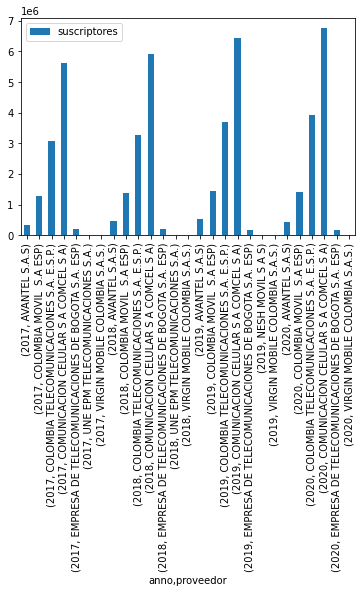

In [ ]:
df_proved1.plot.bar(stacked=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3806: UserWarning:

Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.



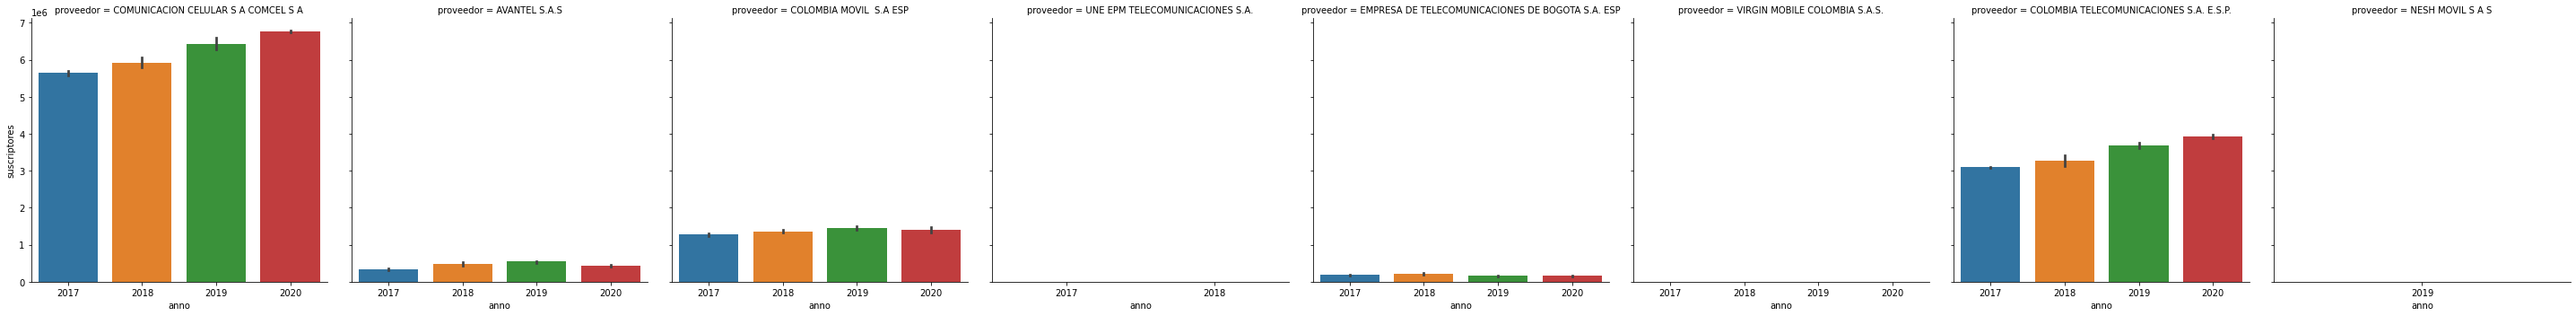

In [ ]:
import seaborn as sns
sns.catplot( col="proveedor",x="anno",
    y="suscriptores", sharex=False, legend_out=True,
    kind="bar",  data=df1)

**INSIGHT 8:** Las empresas con mayor número de suscriptores son COMUNICACION CELULAR S A COMCEL SA Y COLOMBIA TELECOMUNICACIONES S.A. E.S.P

Despues de analizar lo anterior, surge la pregunta, ¿cual es el procentaje total de la población con acceso móvil?

Al hacer los calculos, se detecta que solo el 35% de la población total Colombia tiene acceso a internet móvil.
Siendo este los posibles futuros clientes para la empresa.

In [ ]:
df_proved_to = df1[['anno','suscriptores','poblacion_dane']] #se crea un nuevo df para calcular el número de suscriptores anual
grouped1_to=df_proved_to.groupby(by=['anno','poblacion_dane']) #se agrupan de acuerdo al año y el proveedor(empresa de telefonía)
type(grouped1_to) # Es una serie distita a la normal
# Aplicamos una función de agregación al dataframe agrupado
#Se esoge la función promedio, para conocer en promedio cuantos suscriptores al año tenía cada proveedor
df_proved1_to= grouped1_to.sum()
df_proved1_to.reset_index(level=0, inplace=True) 
df_proved1_to.reset_index(level=0, inplace=True) 
df_proved1_to


poblacion_dane  anno  suscriptores
0        49291609  2017      21035273
1        48258494  2018      44954526
2        49395678  2019      49058653
3        50372424  2020      25371849

In [ ]:
df_proved1_to['percent'] =(df_proved1_to['poblacion_dane'] / df_proved1_to['suscriptores']. sum()) * 100
df_proved1_to

poblacion_dane  anno  suscriptores    percent
0        49291609  2017      21035273  35.102908
1        48258494  2018      44954526  34.367177
2        49395678  2019      49058653  35.177020
3        50372424  2020      25371849  35.872608

**INSIGHT 9:** Solo el 35% de la población total colombiana tiene acceso a internet móvil.

In [ ]:
#Data Profiling: Analisis detallado de cada variable del df1
profile1 = pandas_profiling.ProfileReport(df1)
profile1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Ahora se hace la exploración, limpieza y análisis para el df2, el cual detalla el número de accesos a internet en el territorio colombiano.

In [ ]:
df2=df2.sort_values('anno',ascending=True) # ordenamos usando los valores de forma ascendente
df2.isnull() #se verifican si existen valores nulos


anno  trimestre  proveedor  cod_departamento  departamento  ...  \
357  False      False      False             False         False  ...   
904  False      False      False             False         False  ...   
812  False      False      False             False         False  ...   
406  False      False      False             False         False  ...   
643  False      False      False             False         False  ...   
..     ...        ...        ...               ...           ...  ...   
101  False      False      False             False         False  ...   
389  False      False      False             False         False  ...   
106  False      False      False             False         False  ...   
385  False      False      False             False         False  ...   
713  False      False      False             False         False  ...   

     segmento  tecnologia  velocidad_bajada  velocidad_subida  no_de_accesos  
357     False       False             False             False          False  
904     False       False             False             False          False  
812     False       False             False             False          False  
406     False       False             False             False          False  
643     False       False             False             False          False  
..        ...         ...               ...               ...            ...  
101     False       False             False             False          False  
389     False       False             False             False          False  
106     False       False             False             False          False  
385     False       False             False             False          False  
713     False       False             False             False          False  

[1000 rows x 12 columns]

In [ ]:
df2.info() #se observa el tipo de datos que contine el df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 357 to 713
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   anno              1000 non-null   int64 
 1   trimestre         1000 non-null   int64 
 2   proveedor         1000 non-null   object
 3   cod_departamento  1000 non-null   int64 
 4   departamento      1000 non-null   object
 5   cod_municipio     1000 non-null   int64 
 6   municipio         1000 non-null   object
 7   segmento          1000 non-null   object
 8   tecnologia        1000 non-null   object
 9   velocidad_bajada  1000 non-null   int64 
 10  velocidad_subida  1000 non-null   int64 
 11  no_de_accesos     1000 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 101.6+ KB


In [ ]:
#Se eliminan las columnas que no se necesitan para el análisis (departamento, municipio, cod_municipio)
df2=df2[['anno', 'trimestre', 'proveedor', 'cod_departamento', 'segmento', 'tecnologia',
       'velocidad_bajada', 'velocidad_subida', 'no_de_accesos']]

Código de los departamentos:

* Amazonas: 91
* Antioquia: 5
* Arauca: 81
* Atlántico: 8
* Bogotá D.C.: 11
* Bolívar: 13
* Boyacá: 15
* Caldas: 17
* Caquetá: 18
* Casanare :85
* Cauca: 19
* Cesar: 20
* Chocó: 27
* Córdoba: 23
* Cundinamarca: 25
* Guainía	: 94
* Guaviare: 95
* Huila: 41
* La Guajira: 44
* Magdalena: 47
* Meta: 50
* Nariño: 52
* Norte de Santander: 54
* Putumayo: 86
* Quindío: 63
* Risaralda: 66
* San Andrés: 88
* Santander: 68
* Sucre: 70
* Tolima: 73
* Valle del Cauca: 76
* Vaupés: 97
* Vichada: 99

In [ ]:
df2.duplicated() #se verifica que no existan datos duplicados
df2= df2.drop_duplicates() #se eliminan los posibles duplicados

Ahora separamos los datos que se van agrupar para el análisis, el cual se enfoca en identificar el número de accesos de acuerdo a su tipo (resindecial-corporativo-sin estratificar) y el proveedor encargado.

In [ ]:
df2_seg=df2[['proveedor','segmento','no_de_accesos']] #se separan los datos que se desean agrupar
grouped=df2_seg.groupby(by=['segmento','proveedor']) #se agrupan por segmento y proveedor
type(grouped) # Es una serie distita a la normal
segmento= grouped.sum() #se suma el número de accesos por cada segmento
segmento


no_de_accesos
segmento         proveedor                                                        
CORPORATIVO      ASOCIACION COMUNITARIA DE TELEVISION POR CABLE ...              1
                 ATENEA TELECOMUNICACIONES S.A.S.                                5
                 AXESAT S.A.                                                    15
                 AZTECA COMUNICACIONES COLOMBIA S.A.S                          235
                 BANSAT S.A.                                                     4
...                                                                            ...
SIN ESTRATIFICAR KALU DE COLOMBIA SAS                                            1
                 NETPLUS TELECOMUNICACIONES SAS                                  2
                 OSPIREDES S.A.S                                                27
                 VELONET S.A.S                                                6409
                 WIRELESS COMMUNICATIONS COLOMBIA S.A.S. - WIRLC...              3

[221 rows x 1 columns]

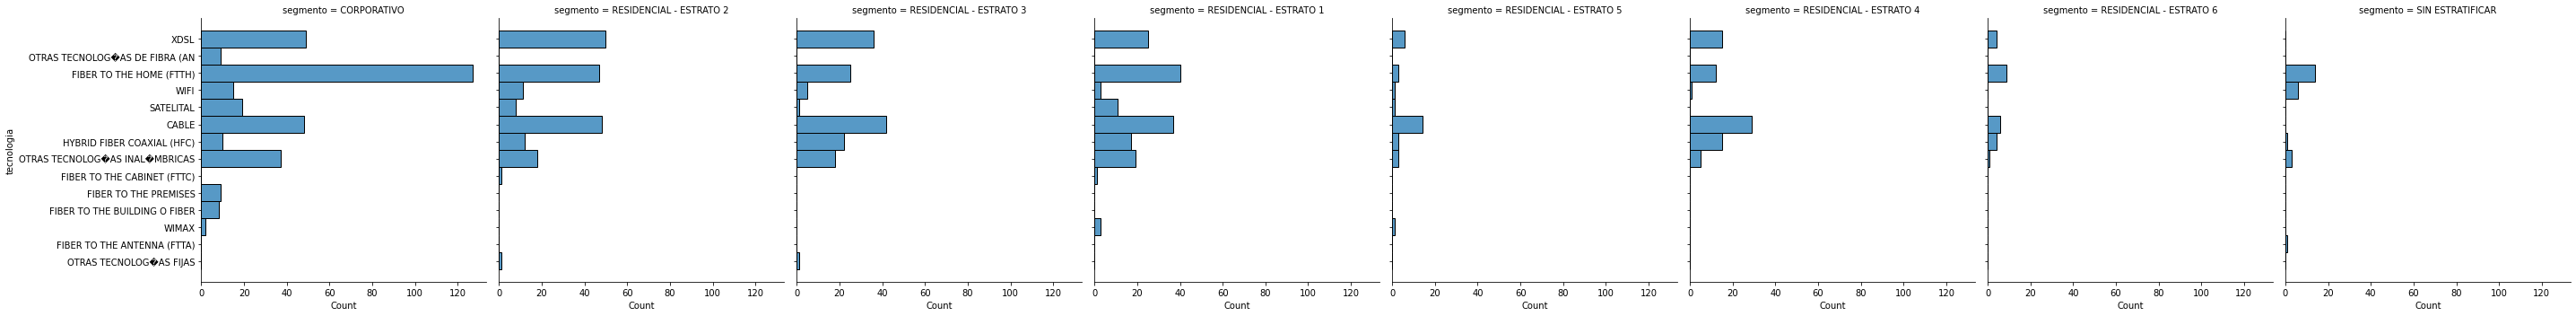

In [ ]:
sns.displot(data=df2, y="tecnologia", col='segmento') #tipo de tecnologia más usada en cada segmento

In [ ]:
#Ahora se calcula cantidad de #de accesos por departamento
df2_acc=df2[['cod_departamento','anno','no_de_accesos']] #se separan los datos que se desean agrupar
df2_acc. head()

cod_departamento  anno  no_de_accesos
357                25  2020              1
904                23  2020              2
812                25  2020              1
406                15  2020             47
643                50  2021              1

In [ ]:
groupedacc=df2_acc.groupby(by=['anno','cod_departamento']) #se agrupan por año y departamento
type(groupedacc) # Es una serie distita a la normal
acceso= groupedacc.sum() #se suma el número de accesos por cada segmento
acceso

no_de_accesos
anno cod_departamento               
2020 15                           47
     23                            2
     25                            2
2021 5                         19831
     8                          2619
...                              ...
2022 70                            1
     73                           43
     76                          308
     81                          250
     85                            6

[56 rows x 1 columns]

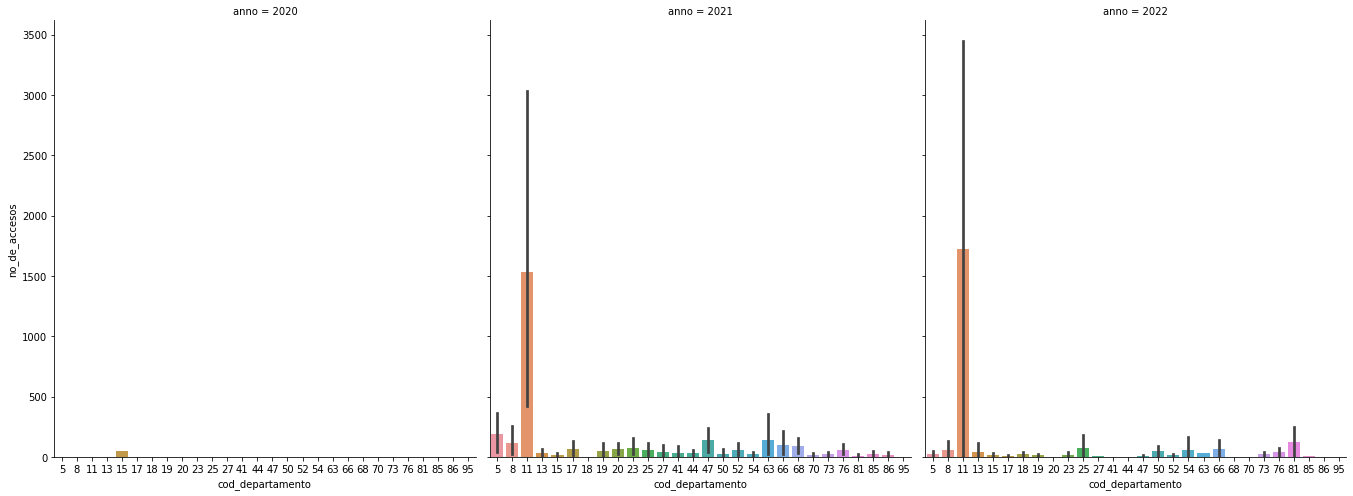

In [ ]:
sns.catplot( x="cod_departamento", col ="anno", height=7, aspect=.9,
    y ="no_de_accesos", kind="bar", data= df2_acc)

Para tener una mejor vista se seleccionan los primeros dias valores con mayor números de accesos en cada región:

In [ ]:
df2_acc_top10=df2_acc.groupby('cod_departamento')[['no_de_accesos']].sum()
df2_acc_top10=df2_acc_top10.sort_values('no_de_accesos',ascending=False) # ordenamos usando los valores de forma descendente
df2_acc_top10.reset_index(inplace = True)
df2_acc_top10.head()

cod_departamento  no_de_accesos
0                11          41803
1                 5          20132
2                25           8863
3                76           4902
4                68           4493

In [ ]:
df2_acc_top10=df2_acc_top10.iloc[0:10] #se seleccionan los 10 primeros valores
df2_acc_top10

cod_departamento  no_de_accesos
0                11          41803
1                 5          20132
2                25           8863
3                76           4902
4                68           4493
5                66           3567
6                 8           2916
7                63           2786
8                19           1841
9                17           1775

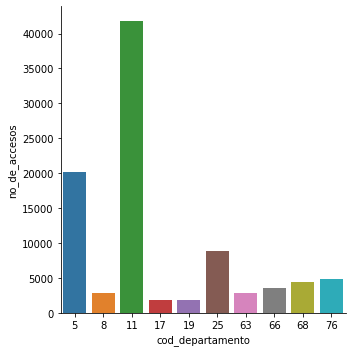

In [ ]:
sns.catplot( x= "cod_departamento", y ="no_de_accesos", kind="bar", data= df2_acc_top10) 

- **5: Antioquia**
- 8: Atlántico
- **11: Bogota DC**
- 17: Caldas
- 19: Cauca
- **25: Cundinamarca**
- 63: Quindío
- 66: Risaralda
- **68: Santander**
- **76: Valler del Cauca**

**INSIGHT 10:** Los departamentos que tienen mayor acceso a internet por cable son Bogota DC, Antioquia, Cundinamarca, Santander y Valle del Cauca.

In [ ]:
#Data Profiling: Analisis detallado de cada variable del df2
profile2 = pandas_profiling.ProfileReport(df2)
profile2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**INSIGHT 11:** El 63% del acceso a intenet por cable son del segmento Residencial, el resto pertence al sector coorporativo.

###Conclusiones generales
En conclusión, es evidente que la compra de electrodomésticos menores de la marca Oster es la preferida por los consumidores, al ser esta una marca reconocida por la calidad de sus productos, durabilidad, y multifuncionalidad. Por otra parte es claro que, el producto con mayor compra dentro de la plataforma LINIO son las licuadoras, siendo esta la mayor generadora de ingresos, seguido por las freidoras de aire y los ventiladores. Los datos recolectados fluctúan dentro de los primeros meses del 2022, siendo enero el mes con mayor venta, y los últimos días de febrero y empezando el mes de marzo con menores ingresos.

En cuanto a los departamentos con  mayores compras se encuentra el departamento de Cundinamarca, Bogotá DC, Valle del Cauca, Antioquia y Santander, ya que es en estos departamentos donde esta el mayor número de conexiones a internet de todo el país.

####Insights obtenidos
- Los productos preferidos y más comprados en la plataforma virtual son las Licuadoras, los ventiladores, las freidoras de aire, cafeteras y ollas arroceras
- La marca con mayor popularidad en la plataforma es OSTER, ya que esta ofrece garantía del producto hasta de 1 año después de la compra, además del fácil acceso a la obtención de repuesto de sus productos. 
- La venta promedio dentro de la plataforma linio está entre los 5 '000.0000 y 6' 000.000 de pesos colombianos.
- Los departamentos con mayores pedidos son Bogotá DC, Cundinamarca, Valle del Cauca, Antioquia y Santander. 
- La licuadora más vendida es la Licuadora Oster Reversible de Color negro (983), seguida por la licuadora cromada con vaso de vidrio (268). 
- La transportadora más usada para el envío de los productos es TCC con un total de 1510 envíos, seguido por Deprisa con un total de 871 envíos.
- Del total de los pedidos realizados durante el primer trimestre del 2022 47 pedidos fueron cancelados, 65 pedidos no se completaron, y 24 fueron devueltos. - De los 2568 pedidos realizados el 90% fueron completados con éxito.
- Solo el 35% de la población total colombiana tiene acceso a internet móvil.
- Los departamentos que tienen mayor acceso a internet por cable son Bogota DC, Antioquia, Cundinamarca, Santander y Valle del Cauca.
